# Import libraries 

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
movies= pd.read_csv("my_movies.csv")
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


# Pre-Processing
As the data is not in transaction formation 
We are using transaction Encoder

In [4]:
df=pd.get_dummies(movies)
df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


In [5]:
k=min(df.mean())
k

0.1

# Apriori Algorithm 

In [6]:
frequent_itemsets = apriori(df, min_support=0.09, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V4_Green Mile, V2_LOTR1, V3_Harry Potter1, V1..."
1393,0.1,"(V4_Green Mile, V2_LOTR1, V3_Harry Potter1, V1..."
1394,0.1,"(V4_Green Mile, V2_LOTR1, V3_Harry Potter1, V1..."
1395,0.1,"(V4_Green Mile, V2_LOTR1, V1_Sixth Sense, LOTR..."


In [7]:
frequent_itemsets1 = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V4_Green Mile, V2_LOTR1, V3_Harry Potter1, V1..."
1393,0.1,"(V4_Green Mile, V2_LOTR1, V3_Harry Potter1, V1..."
1394,0.1,"(V4_Green Mile, V2_LOTR1, V3_Harry Potter1, V1..."
1395,0.1,"(V4_Green Mile, V2_LOTR1, V1_Sixth Sense, LOTR..."


In [8]:
frequent_itemsets2 = apriori(df, min_support=0.2, use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
76,0.4,"(V2_Patriot, Gladiator, V3_Sixth Sense, Sixth ..."
77,0.4,"(V2_Patriot, Gladiator, V3_Sixth Sense, V1_Gla..."
78,0.4,"(V2_Patriot, V3_Sixth Sense, V1_Gladiator, Six..."
79,0.4,"(V2_Patriot, Gladiator, V3_Sixth Sense, V1_Gla..."


In [9]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(V1_Sixth Sense),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
...,...,...,...,...,...,...,...,...,...
56755,"(Sixth Sense, V5_LOTR2)","(V4_Green Mile, V2_LOTR1, V1_Sixth Sense, LOTR...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56756,"(V5_LOTR2, Green Mile)","(V4_Green Mile, V2_LOTR1, V1_Sixth Sense, Sixt...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56757,(V2_LOTR1),"(V4_Green Mile, V3_Harry Potter1, V1_Sixth Sen...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56758,(V3_Harry Potter1),"(V4_Green Mile, V2_LOTR1, V1_Sixth Sense, LOTR...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [10]:
rules1 = association_rules(frequent_itemsets1, metric="confidence", min_threshold=0.6)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
56956,"(Sixth Sense, V5_LOTR2)","(V4_Green Mile, V2_LOTR1, V1_Sixth Sense, LOTR...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56957,"(V5_LOTR2, Green Mile)","(V4_Green Mile, V2_LOTR1, V1_Sixth Sense, Sixt...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56958,(V2_LOTR1),"(V4_Green Mile, V3_Harry Potter1, V1_Sixth Sen...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56959,(V3_Harry Potter1),"(V4_Green Mile, V2_LOTR1, V1_Sixth Sense, LOTR...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [11]:
rules2 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.8)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
2,(V1_Sixth Sense),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(V3_Sixth Sense),(Sixth Sense),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
4,(V4_Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
...,...,...,...,...,...,...,...,...,...
417,"(Sixth Sense, V3_Sixth Sense)","(V1_Gladiator, Gladiator, Patriot, V2_Patriot)",0.4,0.6,0.4,1.000000,1.666667,0.16,inf
418,"(Patriot, V3_Sixth Sense)","(Sixth Sense, V1_Gladiator, Gladiator, V2_Patr...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
419,"(Sixth Sense, V1_Gladiator)","(Patriot, Gladiator, V3_Sixth Sense, V2_Patriot)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
420,"(Sixth Sense, Patriot)","(V1_Gladiator, Gladiator, V3_Sixth Sense, V2_P...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf


#####  An leverage value of 0 indicates independence. Range will be [-1 1]
A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [12]:
rules.sort_values('lift',ascending = False)
rules = pd.DataFrame(rules[rules.lift>1])
len(rules)

56760

In [13]:
rules1.sort_values('lift',ascending = False)
rules1 = pd.DataFrame(rules1[rules1.lift>1])
len(rules1)

56961

In [14]:
rules2.sort_values('lift',ascending = False)
rules2 = pd.DataFrame(rules2[rules2.lift>1])
len(rules2)

422

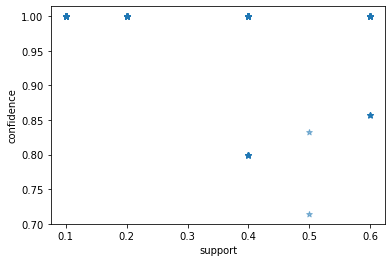

In [15]:

import matplotlib.pyplot as plt

plt.scatter(rules.support, rules.confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

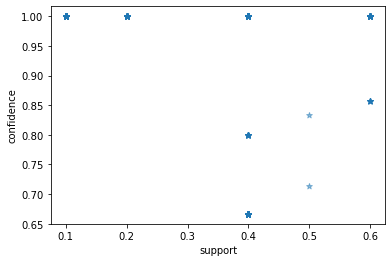

In [16]:
import matplotlib.pyplot as plt

plt.scatter(rules1.support, rules1.confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

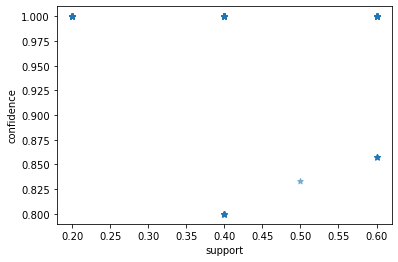

In [17]:
import matplotlib.pyplot as plt

plt.scatter(rules2.support, rules2.confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [18]:
rules.to_csv('rules_movies.csv')

In [19]:
rules1.to_csv('rules_movies1.csv')

In [20]:
rules2.to_csv('rules_movies2.csv')

In [21]:
from pyvis import network as net
import networkx as nx

p= net.Network(notebook=True)
nxg = nx.complete_graph(16)
p.from_nx(nxg)
p.show('rules_movies.html')

In [22]:
p= net.Network(notebook=True)
nxg = nx.complete_graph(16)
p.from_nx(nxg)
p.show('rules_movies1.html')

In [23]:
p= net.Network(notebook=True)
nxg = nx.complete_graph(16)
p.from_nx(nxg)
p.show('rules_movies2.html')